<a href="https://colab.research.google.com/github/franckbizimana/Wamungu/blob/main/Unsupervised_Clustering_Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clustering Agorithms

## **Mall Customer Segmentation Model**

## Project Scope:

Malls are often indulged in the race to increase their customers and making sales. To achieve this task machine learning is being applied by many malls already.

It is amazing to realize the fact that how machine learning can aid in such ambitions. The shopping malls make use of their customers’ data and develop ML models to target the right audience for right product marketing.


**Your role:** Mall Customer data is an interesting dataset that has hypothetical customer data. It puts you in the shoes of the owner of a supermarket. You have customer data, and on this basis of the data, you have to divide the customers into various groups.

**Goal:** Build an unsupervised clustering model to segment customers into correct groups.

**Specifics:**

* Machine Learning task: Clustering model
* Target variable: N/A
* Input variables: Refer to data dictionary below
* Success Criteria: Cannot be validated beforehand


## Data Dictionary:

* **CustomerID:** Unique ID assigned to the customer
* **Gender:** Gender of the customer
* **Age:** Age of the customer
* **Income:** Annual Income of the customers in 1000 dollars
* **Spending_Score:** Score assigned between 1-100 by the mall based on customer' spending behavior

## **Data Analysis and Data Prep**

### Loading all the necessary packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

### Reading the data

In [3]:
df = pd.read_csv('mall_customers.csv')
df.head()

,Customer_ID,Gender,Age,Annual_Income,Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
# Check some quick stats of the data
df.describe()

,Customer_ID,Age,Annual_Income,Spending_Score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
df.shape

(200, 5)

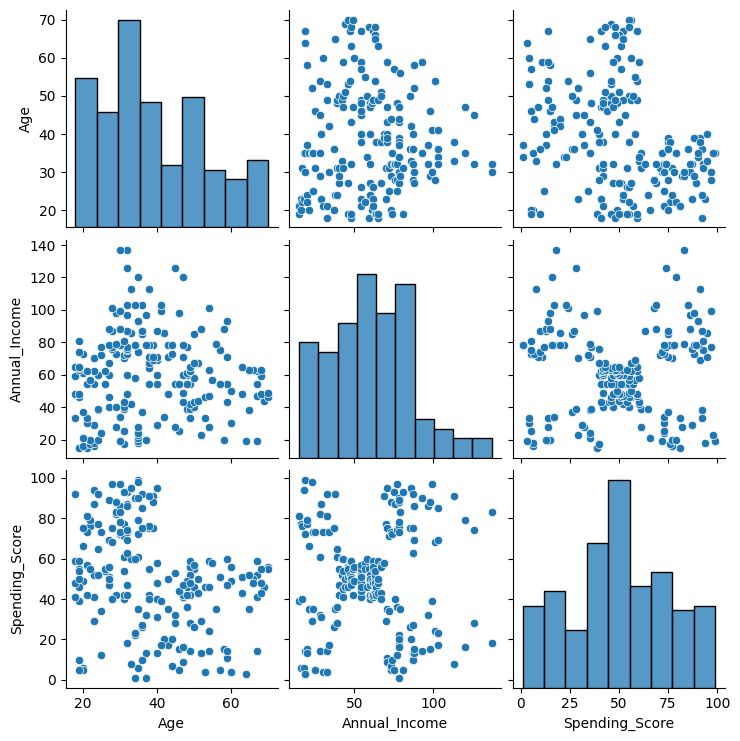

In [5]:
# let's plot a pairplot
sns.pairplot(df[['Age','Annual_Income','Spending_Score']])
plt.show()

* As a mall owner you are interested in the customer spending score. If you look at spending vs Age, you can observe that the spending score is high for customers between age 20-40, and relatively low for customers beyond 40.
<br><br>
* Remember, K-means clustering is sensitive to outliers. So, if you see any guilty outliers you should consider removing them.

In [6]:
# import kmeans model
from sklearn.cluster import KMeans

In [7]:
# Let' train our model on spending_score and annual_income
kmodel = KMeans(n_clusters=5).fit(df[['Annual_Income','Spending_Score']])

#### We will build a model with only 2 features for now to visualise it, and later we will add more feature' and use the evaluation metric silhouette measure.

In [8]:
# check your cluster centers
kmodel.cluster_centers_

array([[86.53846154, 82.12820513],
       [55.2962963 , 49.51851852],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348],
       [25.72727273, 79.36363636]])

In [9]:
# Check the cluster labels
kmodel.labels_

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 1,
       3, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 0, 1, 0, 2, 0, 2, 0,
       1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0], dtype=int32)

In [10]:
# Put this data back in to the main dataframe corresponding to each observation
df['Cluster'] = kmodel.labels_

In [11]:
# check the dataset
df.head()

,Customer_ID,Gender,Age,Annual_Income,Spending_Score,Cluster
0,1,Male,19,15,39,3
1,2,Male,21,15,81,4
2,3,Female,20,16,6,3
3,4,Female,23,16,77,4
4,5,Female,31,17,40,3


In [12]:
# check how many observations belong to each cluster
df['Cluster'].value_counts()

,count
Cluster,
1,81
0,39
2,35
3,23
4,22


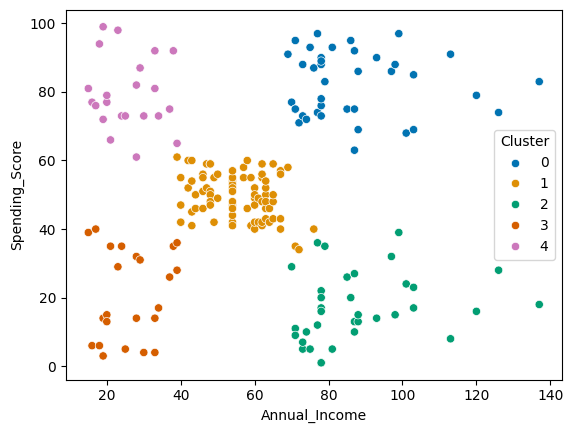

In [13]:
# Let' visualize these clusters
sns.scatterplot(x='Annual_Income', y = 'Spending_Score', data=df, hue='Cluster', palette='colorblind')
plt.show()

#### Visually we are able to see 5 clear clusters. Let's verify them using the Elbow and Silhouetter Method

## 1. Elbow Method

* We will analyze clusters from 3 to 8 and calculate the WCSS scores. The WCSS scores can be used to plot the Elbow Plot.

* WCSS = Within Cluster Sum of Squares

In [14]:
# try using a for loop
k = range(3,9)
K = []
WCSS = []
for i in k:
    kmodel = KMeans(n_clusters=i).fit(df[['Annual_Income','Spending_Score']])
    wcss_score = kmodel.inertia_
    WCSS.append(wcss_score)
    K.append(i)

In [15]:
K, WCSS

([3, 4, 5, 6, 7, 8],
 [106348.37306211119,
  73880.64496247198,
  44448.45544793369,
  38858.959975143895,
  31632.259809473468,
  26676.78076960076])

In [16]:
# Store the number of clusters and their respective WSS scores in a dataframe
wss = pd.DataFrame({'cluster': K, 'WSS_Score':WCSS})
wss

,cluster,WSS_Score
0,3,106348.373062
1,4,73880.644962
2,5,44448.455448
3,6,38858.959975
4,7,31632.259809
5,8,26676.780770


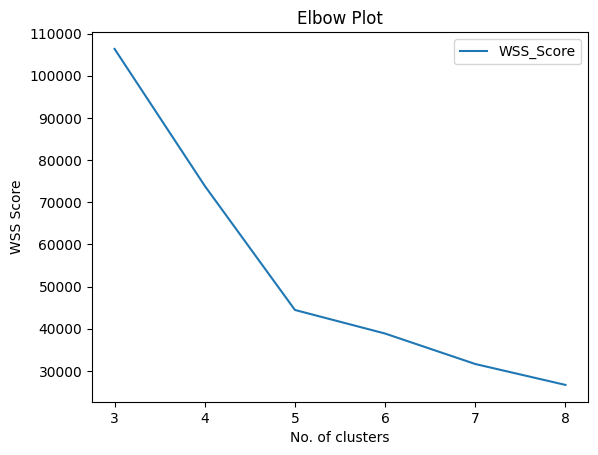

In [17]:
# Now, plot a Elbow plot
wss.plot(x='cluster', y = 'WSS_Score')
plt.xlabel('No. of clusters')
plt.ylabel('WSS Score')
plt.title('Elbow Plot')
plt.show()

We get 5 clusters as a best value of k using the WSS method.

## 2. Silhouette Measure

Check the value of K using the Silhouette Measure

In [18]:
# import silhouette_score
from sklearn.metrics import silhouette_score

In [19]:
# same as above, calculate sihouetter score for each cluster using a for loop

# try using a for loop
k = range(3,9) # to loop from 3 to 8
K = []         # to store the values of k
ss = []        # to store respective silhouetter scores
for i in k:
    kmodel = KMeans(n_clusters=i,).fit(df[['Annual_Income','Spending_Score']], )
    ypred = kmodel.labels_
    sil_score = silhouette_score(df[['Annual_Income','Spending_Score']], ypred)
    K.append(i)
    ss.append(sil_score)

In [20]:
ss

[0.46761358158775435,
 0.4937945814354117,
 0.553931997444648,
 0.5461003519476761,
 0.5321706886465517,
 0.4559501771281188]

In [21]:
# Store the number of clusters and their respective silhouette scores in a dataframe
wss['Silhouette_Score']=ss

In [22]:
wss

,cluster,WSS_Score,Silhouette_Score
0,3,106348.373062,0.467614
1,4,73880.644962,0.493795
2,5,44448.455448,0.553932
3,6,38858.959975,0.546100
4,7,31632.259809,0.532171
5,8,26676.780770,0.455950


### Silhouette score is between -1 to +1

closer to +1 means the clusters are better

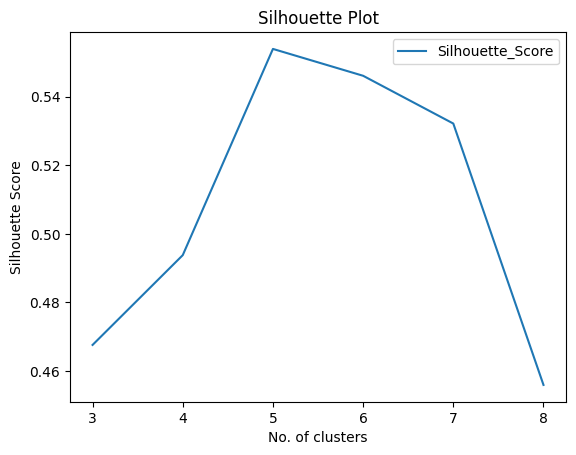

In [23]:
# Now, plot the silhouette plot
wss.plot(x='cluster', y='Silhouette_Score')
plt.xlabel('No. of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Plot')
plt.show()

#### Conclusion: Both Elbow and Silhouette methods gave the optimal value of k=5

## Now use all the available features and use the k-means model.

* Remember, now you cannot visualise the clusters with more than 2 features.
* So, the optimal number of clusters can be only determined by Elbow and Silhouette methods.

In [24]:
# Train a model on 'Age','Annual_Income','Spending_Score' features
k = range(3,9)
K = []
ss = []
for i in k:
    kmodel = KMeans(n_clusters=i,).fit(df[['Age','Annual_Income','Spending_Score']], )
    ypred = kmodel.labels_
    sil_score = silhouette_score(df[['Age','Annual_Income','Spending_Score']], ypred)
    K.append(i)
    ss.append(sil_score)

In [25]:
# Store the number of clusters and their respective silhouette scores in a dataframe
Variables3 = pd.DataFrame({'cluster': K, 'Silhouette_Score':ss})
Variables3

,cluster,Silhouette_Score
0,3,0.335580
1,4,0.392369
2,5,0.439808
3,6,0.451649
4,7,0.410605
5,8,0.371244


<Axes: xlabel='cluster'>

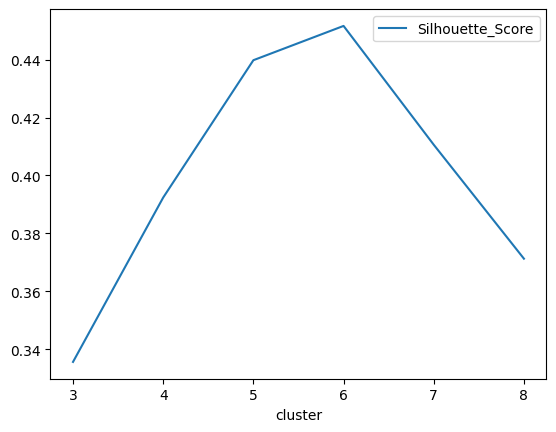

In [26]:
# Now, plot the silhouette plot
Variables3.plot(x='cluster', y='Silhouette_Score')

#### Conclusion: With 3 features we now have the optimal value of k=6

### Exercise:

Use argument `init=kmeans++` as a hyperparameter while training the model.

KMEANS++ internally analyzes the patterns of the data. Such as the shape of data (whether it is spherical, rectangle, oval etc.) and then initializes the centroids. Thus, assigning the clusters in a smart way.